## Dr. Ignaz Semmelweis
Here, I reanalyzed the medical data Dr. Ignaz Semmelweis collected to show the necessity of hand-washing. I followed instructions written by Rasmus Bååth from DataCamp Projects. 

## Load in the Dataset
The table below shows the number of births and deaths, from 1841 to 1846, at the two clinics in Vienna General Hospital. 

In [1]:
import pandas as pd
yearly = pd.read_csv("yearly_deaths_by_clinic.csv")
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


### Proportion of Deaths

In [12]:
# Calculate proportion of deaths per number of births and add this data as a new column to the tables below: 
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]

In [13]:
# Extract clinic 1 data into yearly1
yearly1 = yearly[yearly["clinic"] == "clinic 1"]

# Print out yearly1
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [4]:
# Extract clinic 2 data into yearly2
yearly2 = yearly[yearly["clinic"] == "clinic 2"]

# Print out yearly2
yearly2

,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


Text(0, 0.5, 'Proportion deaths')

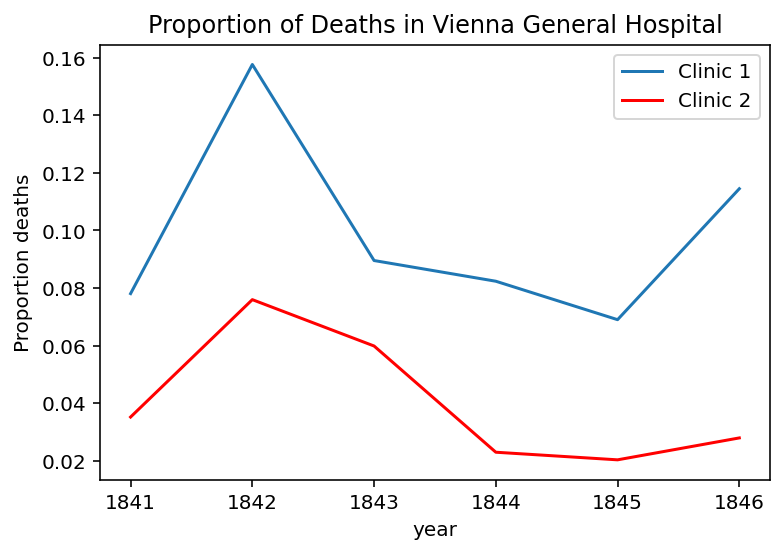

In [28]:
# This makes plots appear in the notebook
%matplotlib inline

# Plot the yearly proportion of deaths at both clinics (clinic 1 and clinic 2)
ax = yearly1.plot(x="year", y="proportion_deaths", label="Clinic 1")
yearly2.plot(x="year", y="proportion_deaths", label="Clinic 2", ax=ax, color='red')
ax.set_title('Proportion of Deaths in Vienna General Hospital')
ax.set_ylabel("Proportion deaths")

## Clinic 1

Note from the above figure that the yearly proportion of deaths in Clinic 1 is much higher than in Clinic 2. There was one difference between the two clinics: medical students worked in Clinic 1, while midwives students worked in Clinic 2. Midwives exclusively assisted women giving birth, but the medical students also studied corpses. Dr. Semmelweis hypothesized that the medical students are spreading something from the corpses, and that this thing is causing an alarming amount of women to die. In the summer of 1847 (1847-06-01), Dr. Semmelweis decided to make washing hands mandatory – which was a controversial decision at the time. We will now examine monthly data from Clinic 1 to see if his decision had an effect on the proprotion of deaths.


In [19]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv("monthly_deaths.csv", parse_dates=["date"])

# Calculate proportion of deaths per number of births
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

# Print out the first rows in monthly
monthly.head(10)

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
5,1841-06-01,200,10,0.050000
6,1841-07-01,190,16,0.084211
7,1841-08-01,222,3,0.013514
8,1841-09-01,213,4,0.018779
9,1841-10-01,236,26,0.110169


Text(0, 0.5, 'Proportion deaths')

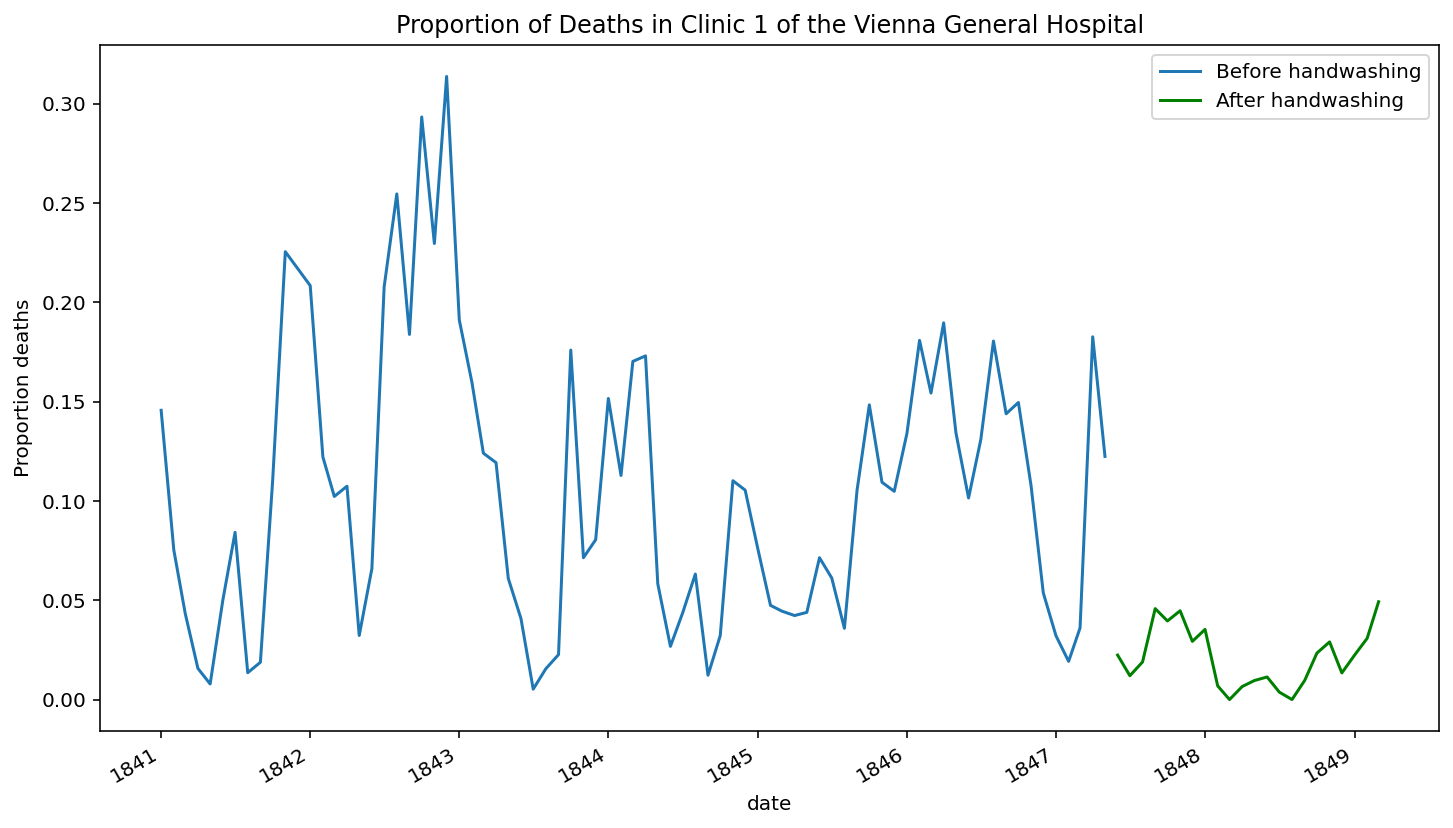

In [27]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x="date", y="proportion_deaths",
                         label="Before handwashing")
after_washing.plot(x="date", y="proportion_deaths",
                   label="After handwashing", ax=ax, color='green')
ax.set_title('Proportion of Deaths in Clinic 1 of the Vienna General Hospital')
ax.set_ylabel("Proportion deaths")

In [8]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

## Conclusion
The figure in cell 11, shows that handwashing had a huge effect on the proportion of deaths. On average, it reduced the monthly proportion of deaths by 8 percentage points. 